In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
%matplotlib inline
from PIL import Image 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [9]:
TRAIN_IMG = os.listdir('train_images')
TEST_IMG = os.listdir('test_images')
print('Original train count =',len(TRAIN_IMG),', Original test count =',len(TEST_IMG))
print('New train count = 1801 , New test count = 1801')

Original train count = 12568 , Original test count = 1801
New train count = 1801 , New test count = 1801


In [9]:

os.mkdir('tmp/')
os.mkdir('tmp/train_images/')
choice = np.random.choice(TRAIN_IMG,len(TEST_IMG),replace=False)
for i,f in enumerate(choice):
    img = Image.open('train_images/'+f)
    img.save('tmp/train_images/'+f)
os.mkdir('tmp/test_images/')
for i,f in enumerate(TEST_IMG):
    img = Image.open('test_images/'+f)
    img.save('tmp/test_images/'+f)

Original train count = 12568 , Original test count = 1801
New train count = 1801 , New test count = 1801


In [50]:
PATH= 'tmp/'
SAVE_PATH= 'tmp/tmp'
gen_data = datagen.flow_from_directory(PATH,                                       
                                       shuffle=False, 
                                       save_to_dir=SAVE_PATH,
                                       subset='training',                                                                       
 )
for file in gen_data.filenames:
    print(file)

Found 1 images belonging to 3 classes.
train_images\person.jpg


In [43]:
for i in range(5):
    gen_data.next() 

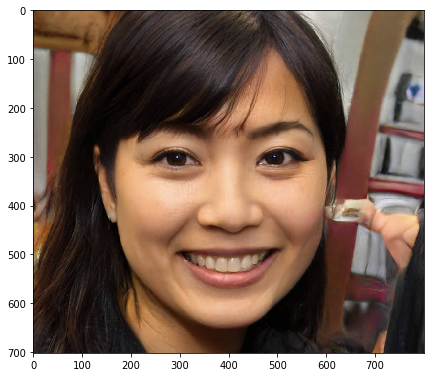

In [64]:
# 导入并显示图片

img_path = 'tmp/train_images/person.jpg'
img = image.load_img(img_path)
plt.figure(figsize=(7,7))
plt.imshow(img)

In [139]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,  
    brightness_range =None
    )

In [140]:
def show_image():
    # 将图片转为数组
    x = image.img_to_array(img)
    # 扩充一个维度
    x = np.expand_dims(x, axis=0)
    # 生成图片
    gen = datagen.flow(x, batch_size=1)#,save_to_dir=SAVE_PATH, save_prefix='gen')use random save

    # 显示生成的图片
    plt.figure(figsize=(12,12))
    for i in range(3):
        for j in range(3):
            x_batch = gen.next() 
            idx = (3*i) + j        
            plt.subplot(3, 3, idx+1)      
            plt.imshow(x_batch[0]/256)
            #matplotlib.image.imsave('tmp/train_images/'+str(idx+1)+'_name.jpg', x_batch[0]/256)  

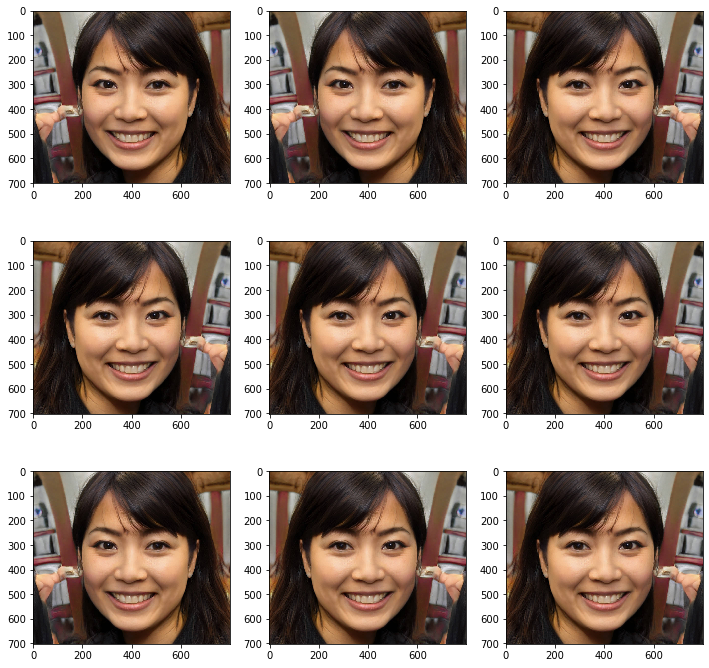

In [141]:
show_image()# horizontal_flip=True,

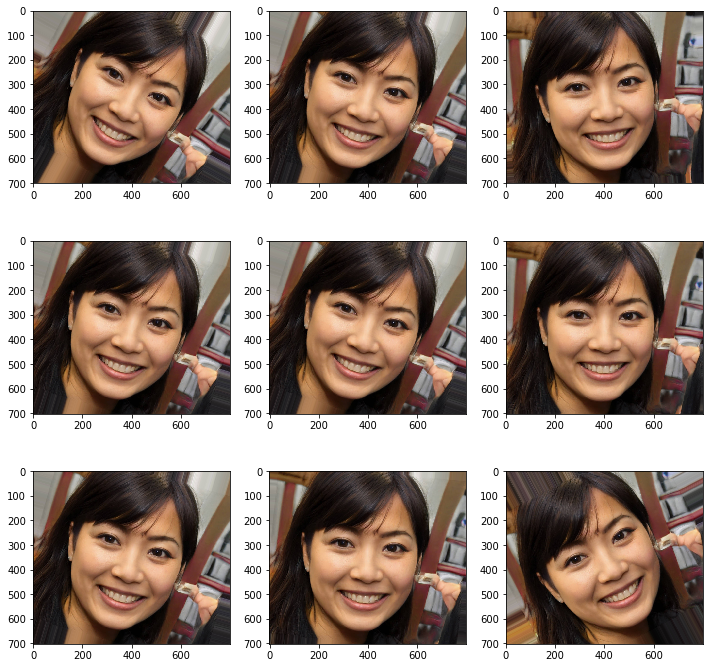

In [138]:
show_image()#rotation_range=[0., 90]

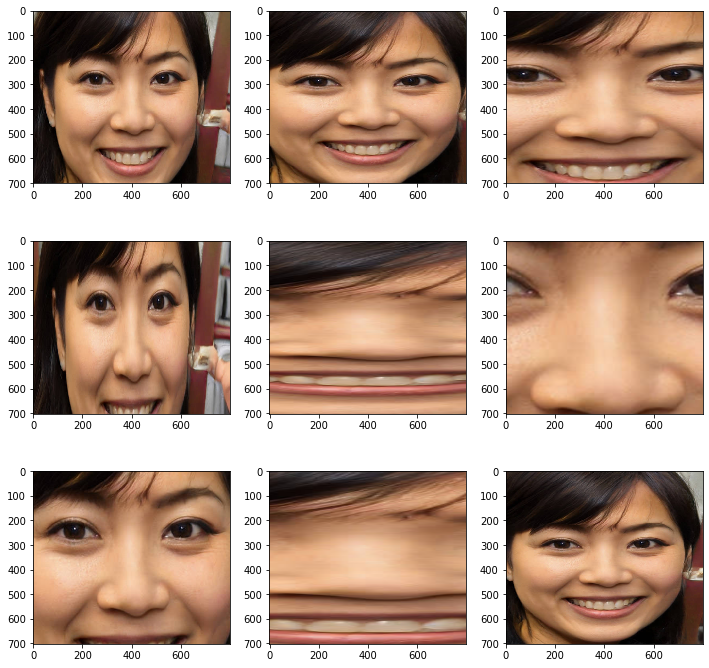

In [130]:
show_image()# zoom_range=[0.1, 1],

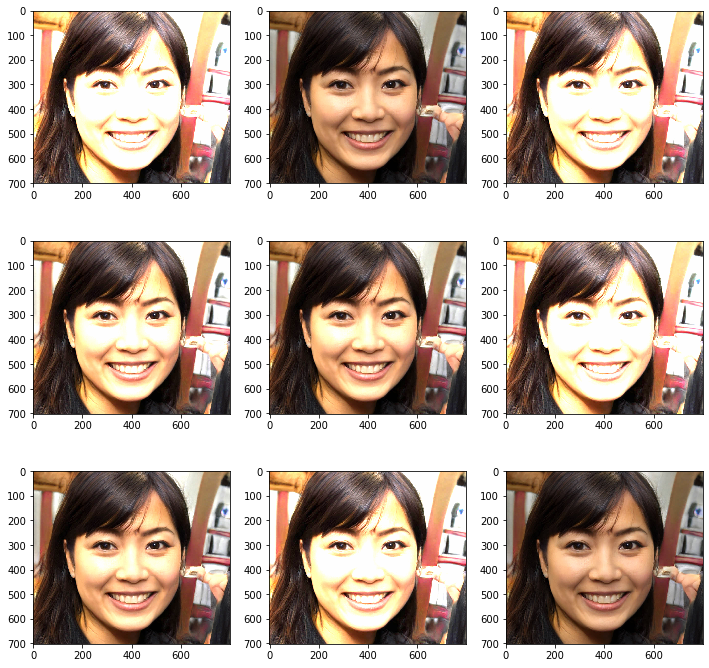

In [123]:
show_image()#brightness_range =[1, 3]

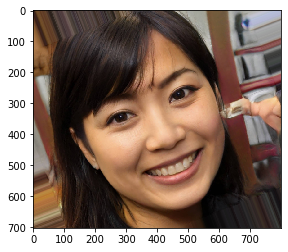

In [86]:
import matplotlib
plt.imshow(x_batch[0]/256)
matplotlib.image.imsave('tmp/train_images/name.jpg', x_batch[0]/256)